In [1]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import math #need this for 'math.exp' in logistic regression function

In [2]:
pd.set_option('html', True) #see the dataframe in a more user friendly manner

## Logistic Regression Overview

As with linear regression, logistic regression models the relationship between dependent and independent variables. This time we are concerned with categorical variables (e.g. yes or no, heads or tails), and logistic regression helps us predict the likelihood of events occurring. Essentially, we want to know what the odds are that we'll win instead of lose. In order to understand the odds that logistic regression deals with, you should know about odds ratios.

Odds ratios tell us the probability of one thing happening as it compares to the probability of another thing happening. If someone tells you that the odds of winning are 1:4, that means there is 1 part chance of winning and 4 parts chance of losing. That means there's 5 parts total, and that the probability of winning is 1/5 = 0.2 = 20%. The probability of losing is 4/5 = 0.8 = 80%. (Remember that if the probability of winning is p, then the probability of losing is 1-p.) Depending on the ratio of the probability of winning to the probability of losing, we have more or less confidence in the outcome.
Odds ratios should be familiar if you know about sports betting odds or a little about casinos.

In [3]:
#load data:
loansData = pd.read_csv('loansData_clean.csv')
loansData.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,FICO.Score
0,20000,20000,0.089,36,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14,14272,2,< 1 year,735
1,19200,19200,0.121,36,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12,11140,1,2 years,715
2,35000,35000,0.220,60,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14,21977,1,2 years,690
3,10000,9975,0.100,36,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10,9346,0,5 years,695
4,12000,12000,0.117,36,credit_card,18.78%,NJ,RENT,3195.00,695-699,11,14469,0,9 years,695


In [4]:
#We are only interested in certain columns; let's isolate those only:

loansData1 = loansData.loc[:,('Amount.Requested', 'Interest.Rate', 'FICO.Score')]
loansData1.head()

#NOTE: slicing out columns should be done with .loc[:, (columns you want)] as opposed to dataframe[[columns you want]].
#Reason explained here: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

,Amount.Requested,Interest.Rate,FICO.Score
0,20000,0.089,735
1,19200,0.121,715
2,35000,0.220,690
3,10000,0.100,695
4,12000,0.117,695


In [5]:
#Add a column to your dataframe indicating whether the interest rate is < 12%. This would be a derived column 
#that you create from the interest rate column. You name it IR_TF. It would contain binary values, 
#i.e.'0' when interest rate < 12% or '1' when interest rate is >= 12%

loansData1['IR_TF'] = loansData1['Interest.Rate'].map(lambda x: 0 if x < 0.12 else 1 if x >= 0.12 else 'Problem')
loansData1.head()

,Amount.Requested,Interest.Rate,FICO.Score,IR_TF
0,20000,0.089,735,0
1,19200,0.121,715,1
2,35000,0.220,690,1
3,10000,0.100,695,0
4,12000,0.117,695,0


In [6]:
#create intercept column with constant intercept of 1.0:
loansData1['intercept'] = 1
loansData1.intercept.value_counts()

1    2500
dtype: int64

In [7]:
loansData1['FICO.Score'] = loansData1['FICO.Score'].astype(float)

In [8]:
loansData1.dtypes

Amount.Requested      int64
Interest.Rate       float64
FICO.Score          float64
IR_TF                 int64
intercept             int64
dtype: object

In [9]:
#Create a list of the column names of our independent variables:
ind_vars = ['intercept','Amount.Requested','FICO.Score',]
print ind_vars

#Intercept must be included in here; The statsmodels function we're going to be using requires that 
#intercepts/constants are specified explicitly.

['intercept', 'Amount.Requested', 'FICO.Score']


In [10]:
loansData1.head()

,Amount.Requested,Interest.Rate,FICO.Score,IR_TF,intercept
0,20000,0.089,735,0,1
1,19200,0.121,715,1,1
2,35000,0.220,690,1,1
3,10000,0.100,695,0,1
4,12000,0.117,695,0,1


## Performing the regression

Specify the column containing the variable you're trying to predict followed by the columns that the model should use to make the prediction.

In [11]:
#train the model:
X = loansData1[ind_vars]
y = loansData1['IR_TF']
logit = sm.Logit(y,X)

In [12]:
# fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.319106
         Iterations 8


## Interpreting the results

In [13]:
print result.summary()

                           Logit Regression Results                           
Dep. Variable:                  IR_TF   No. Observations:                 2500
Model:                          Logit   Df Residuals:                     2497
Method:                           MLE   Df Model:                            2
Date:                Fri, 16 Oct 2015   Pseudo R-squ.:                  0.5228
Time:                        12:48:09   Log-Likelihood:                -797.77
converged:                       True   LL-Null:                       -1671.9
                                        LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
intercept           59.5050      2.398     24.816      0.000        54.805    64.205
Amount.Requested     0.0002    1.1e-05     15.843      0.000         0.000     0.000
FICO.Score          -0.0865 

In [14]:
#Get the fitted coefficients from the results:
coeff = result.params
print coeff

intercept           59.505045
Amount.Requested     0.000175
FICO.Score          -0.086464
dtype: float64


In [15]:
# look at the confidence interval of each coeffecient
print result.conf_int()

                          0          1
intercept         54.805423  64.204666
Amount.Requested   0.000153   0.000197
FICO.Score        -0.093310  -0.079618


In [16]:
# odds ratios only
print np.exp(result.params)

#This tells you how a 1 unit increase or decrease in a variable affects the odds of getting a loan. Since the Loan Amount
# Fico Score are large numbers; a 1 unit change has an almost insignficant effect on the odds as shown below:

intercept           6.961655e+25
Amount.Requested    1.000175e+00
FICO.Score          9.171686e-01
dtype: float64


In [17]:
# predict whether interest rate is greater than or equal to 12%
loansData1['Prob_int_<12%_loan'] = 1-(result.predict(loansData1[ind_vars]))
loansData1.head()

,Amount.Requested,Interest.Rate,FICO.Score,IR_TF,intercept,Prob_int_<12%_loan
0,20000,0.089,735,0,1,0.633106
1,19200,0.121,715,1,1,0.260437
2,35000,0.220,690,1,1,0.002546
3,10000,0.100,695,0,1,0.238160
4,12000,0.117,695,0,1,0.180519


In [18]:
%matplotlib inline

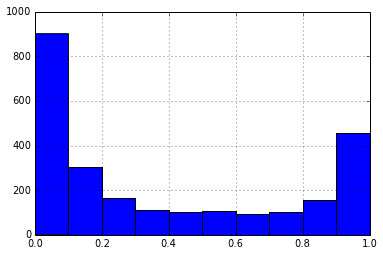

In [19]:
#Graph the probability of attaining loan:
loansData1['Prob_int_<12%_loan'].hist()
plt.show()

In [20]:
#Clear binomial distribution which isn't surprising given that there should be clear cases for approval and rejection; with 
#cases in the middle being more evenly distributed. 

## Challenge

Write a function called logistic_function that will take a FICO Score and a Loan Amount of this linear predictor, and return p. Try not to hardcode any values if you can!  

In [47]:
def logistic_function(loan_amount, FICO_score, coeff):
    '''
    prob = 1 - (1 + e^(intercept - coeff(FICO_score) + coeff(loan_amount)))
    '''
    prob = 1 / (1 + math.exp(coeff[0] + coeff[2]*(FICO_score) + coeff[1]*(loan_amount)))
    #NOTE: FICO_score coefficient is negative (which makes intuitive sense; as your score increases you should pay a lower
    #rate as you are more credit worthy) and thus we need an 'addition' sign in front of it to ensure it reflects the
    #negative value
    
    print 'Probability of getting loan:', prob
    
    if prob > 0.7:
        print 'Loan approval with interest below 12% very likely.'
    else:
        print 'Loan approval with interest below 12% unlikley.'

In [48]:
#Specific probability for a $10,000 loan with a score of 720:
logistic_function(10000,720,coeff)

Probability of getting loan: 0.730824008351
Loan approval with interest below 12% very likely.
